In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi

In [2]:
X = 50
Y = 50

#plane = np.random.randint(0,100,size=(X,Y))
plane = np.full(shape = (X,Y), fill_value=11)

In [3]:
r = X/2
phi = np.linspace(0,2*pi,X)
z = Y

In [26]:
point_cloud = []
for i, row in enumerate(plane):
    for j,point in enumerate(row):
        point_cloud.append((i,phi[j],r,point))

In [ ]:
point_cloud = []
for i, row in enumerate(plane):
    for j,point in enumerate(row):
        point_cloud.append((r*np.cos(phi),r*np.sin(phi), i, point))

In [27]:
new_pc = []
for point in point_cloud:
    new_pc.append((point[2]*np.cos(point[1]), point[2]*np.sin(point[1]), point[0], point[3]))

In [6]:
import plotly.express as px
import pandas as pd

In [29]:
array = np.concatenate(new_pc).reshape((len(new_pc), 4))
key = {'X':array[:,0], 'Y':array[:,1], 'Z':array[:,2], 'color':array[:,3]}
df = pd.DataFrame(key)
df

,X,Y,Z,color
0,25.000000,0.000000e+00,0.0,11.0
1,24.794750,3.196929e+00,0.0,11.0
2,24.182372,6.341365e+00,0.0,11.0
3,23.172919,9.381675e+00,0.0,11.0
4,21.782968,1.226794e+01,0.0,11.0
...,...,...,...,...
2495,21.782968,-1.226794e+01,49.0,11.0
2496,23.172919,-9.381675e+00,49.0,11.0
2497,24.182372,-6.341365e+00,49.0,11.0
2498,24.794750,-3.196929e+00,49.0,11.0


In [20]:
fig = px.scatter_3d(plane2cylinder(plane), x='X', y='Y', z = 'Z', color = 'color', template='plotly_dark')
fig.show()

In [18]:
def plane2cylinder(plane:np.ndarray):
    
    r = plane.shape[1]/2
    phi = np.linspace(0,2*pi,int(plane.shape[1]))
    
    point_cloud = []
    for i, row in enumerate(plane):
        for j,point in enumerate(row):
            point_cloud.append((r*np.cos(phi[j]),r*np.sin(phi[j]), i, point))
            
    array = np.concatenate(point_cloud).reshape((len(point_cloud), 4))
    key = {'X':array[:,0], 'Y':array[:,1], 'Z':array[:,2], 'color':array[:,3]}
    
    return pd.DataFrame(key)

In [ ]:
def axon2cylinder():
    # if not cart2cylin:
    #   cart 2 cylin
    
    # set all r to same, save, plot
    pass

In [8]:
r = np.random.ray(low = 1, high = 5, size=(10000))
phi = np.linspace(0,2*pi,100)
z = np.linspace(0,1,100)

In [10]:
ray = np.random.rayleigh(scale=1, size=(1000))

(array([ 10.,  39.,  50.,  80.,  68., 101.,  93.,  86.,  84.,  69.,  66.,
         51.,  45.,  41.,  35.,  28.,  21.,  11.,  10.,   4.,   3.,   1.,
          3.,   0.,   1.]),
 array([0.03926939, 0.18851154, 0.33775368, 0.48699583, 0.63623798,
        0.78548013, 0.93472227, 1.08396442, 1.23320657, 1.38244871,
        1.53169086, 1.68093301, 1.83017515, 1.9794173 , 2.12865945,
        2.2779016 , 2.42714374, 2.57638589, 2.72562804, 2.87487018,
        3.02411233, 3.17335448, 3.32259662, 3.47183877, 3.62108092,
        3.77032307]),
 <BarContainer object of 25 artists>)

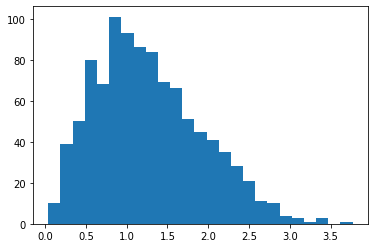

In [13]:
plt.hist(ray, bins = 25)

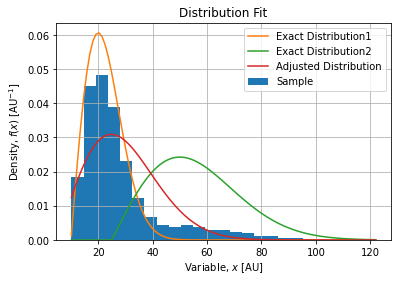

In [64]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Create a Continuous Variable: 
X = stats.rayleigh(loc=10, scale=10)
Y = stats.rayleigh(loc=25, scale=25)

# Sample from this Random variable
x0 = X.rvs(size=10000, random_state=123)
y0 = Y.rvs(size=2000, random_state=111)
x0 = np.concatenate([x0,y0])
#x0 = ray

# Adjust Distribution parameters
loc, scale = stats.rayleigh.fit(x0) # (9.990726961181025, 4.9743913760956335)

# Tabulate over sample range (PDF display):
xl = np.linspace(x0.min(), x0.max(), 100)

# Display Results:
fig, axe = plt.subplots()
axe.hist(x0, density=1, label="Sample", bins = 25)
axe.plot(xl, X.pdf(xl), label="Exact Distribution1")
axe.plot(xl, Y.pdf(xl), label="Exact Distribution2")
axe.plot(xl, stats.rayleigh(scale=scale, loc=loc).pdf(xl), label="Adjusted Distribution")
axe.set_title("Distribution Fit")
axe.set_xlabel("Variable, $x$ $[\mathrm{AU}]$")
axe.set_ylabel("Density, $f(x)$ $[\mathrm{AU}^{-1}]$")
axe.legend()
axe.grid()

In [22]:
def rayl(scale, loc):
    return (loc/scale**2)*np.exp(-(loc**2)/(2*scale**2))

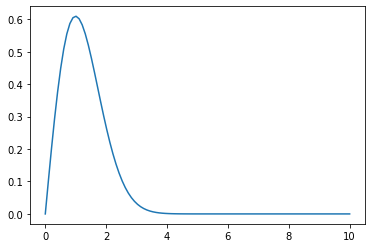

In [33]:
plt.figure()
plt.plot(np.linspace(0,10,100), rayl(0.9950340232106379, np.linspace(0,10,100)))

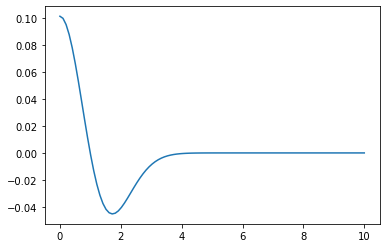

In [35]:
plt.figure()
#plt.plot(rayl(0.9950340232106379, np.linspace(0,10,1000)))
plt.plot(np.linspace(0,10,100), np.gradient(rayl(0.9950340232106379, np.linspace(0,10,100))))

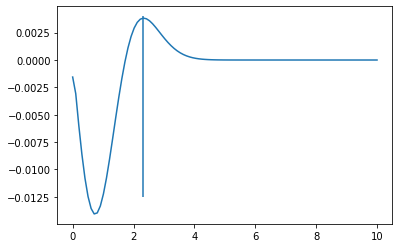

In [45]:
plt.figure()
plt.plot(np.linspace(0,10,100), np.gradient(np.gradient(rayl(0.9950340232106379, np.linspace(0,10,100)))))
plt.vlines(np.linspace(0,10,100)[23],ymin=-0.0125, ymax=0.004)

In [39]:
np.argmax(np.gradient(np.gradient(rayl(0.9950340232106379, np.linspace(0,10,100)))))

23

In [44]:
np.gradient(np.gradient(rayl(0.9950340232106379, np.linspace(0,10,100))))[23]

0.003829388782874251

In [25]:
stats.rayleigh.fit(x0)

(0.025395707207637452, 0.9950340232106379)

In [21]:
def shaveAxon():
    #
    pass

IndentationError: expected an indented block (<ipython-input-21-28c1f0bd16c4>, line 1)

In [19]:
plane2cylinder(plane)

,X,Y,Z,color
0,25.000000,0.000000e+00,0.0,11.0
1,24.794750,3.196929e+00,0.0,11.0
2,24.182372,6.341365e+00,0.0,11.0
3,23.172919,9.381675e+00,0.0,11.0
4,21.782968,1.226794e+01,0.0,11.0
...,...,...,...,...
2495,21.782968,-1.226794e+01,49.0,11.0
2496,23.172919,-9.381675e+00,49.0,11.0
2497,24.182372,-6.341365e+00,49.0,11.0
2498,24.794750,-3.196929e+00,49.0,11.0


<ipython-input-6-a0c4ee99ac8c>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


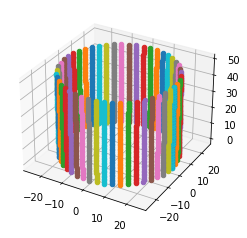

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for point in new_pc:
    ax.scatter(point[0],point[1],point[2])

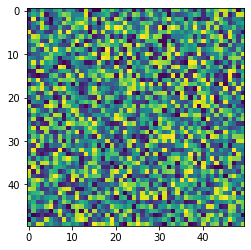

In [7]:
plt.imshow(plane)

In [8]:
plane.shape

(50, 50)

In [11]:
point_cloud[1]

(0, 0.1282282715750936, 25.0)

In [25]:
plane

array([[48, 26, 60, ..., 73, 82, 21],
       [20, 73, 19, ..., 90, 42, 36],
       [46, 49, 91, ..., 92, 91, 59],
       ...,
       [13, 19, 57, ..., 40, 70, 39],
       [42, 93, 25, ..., 45, 92, 95],
       [59, 72, 22, ..., 77, 60, 59]])

In [1]:
import trimesh

In [4]:
test = trimesh.creation.annulus(1,1,10, sections=100)

In [19]:
def make_cylinder(radius, length, nlength, alpha, nalpha, center, orientation):

    #Create the length array
    I = np.linspace(0, length, nlength)

    #Create alpha array avoid duplication of endpoints
    #Conditional should be changed to meet your requirements
    if int(alpha) == 360:
        A = np.linspace(0, alpha, num=nalpha, endpoint=False)/180*np.pi
    else:
        A = np.linspace(0, alpha, num=nalpha)/180*np.pi

    #Calculate X and Y
    X = radius * np.cos(A)
    Y = radius * np.sin(A)

    #Tile/repeat indices so all unique pairs are present
    pz = np.tile(I, nalpha)
    px = np.repeat(X, nlength)
    py = np.repeat(Y, nlength)

    points = np.vstack(( pz, px, py )).T

    #Shift to center
    shift = np.array(center) - np.mean(points, axis=0)
    points += shift

    #Orient tube to new vector

    #Grabbed from an old unutbu answer
    def rotation_matrix(axis,theta):
        a = np.cos(theta/2)
        b,c,d = -axis*np.sin(theta/2)
        return np.array([[a*a+b*b-c*c-d*d, 2*(b*c-a*d), 2*(b*d+a*c)],
                         [2*(b*c+a*d), a*a+c*c-b*b-d*d, 2*(c*d-a*b)],
                         [2*(b*d-a*c), 2*(c*d+a*b), a*a+d*d-b*b-c*c]])

    ovec = orientation / np.linalg.norm(orientation)
    cylvec = np.array([1,0,0])

    if np.allclose(cylvec, ovec):
        return points

    #Get orthogonal axis and rotation
    oaxis = np.cross(ovec, cylvec)
    rot = np.arccos(np.dot(ovec, cylvec))

    R = rotation_matrix(oaxis, rot)
    return points.dot(R)

In [20]:
points = make_cylinder(3, 5, 5, 360, 10, [0,2,0], [1,0,0])

<ipython-input-23-2244aa03e44b>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


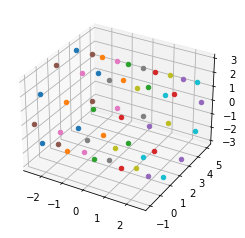

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for point in points:
    ax.scatter(point[0],point[1],point[2])

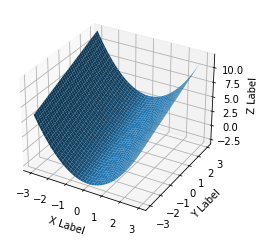

In [24]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

[0.   0.25 0.5  0.75 1.  ]


<ipython-input-51-0767284eff7a>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


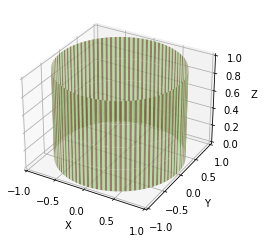

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

nphi,nz=180,5
r=1 # radius of cylinder
phi = np.linspace(0,360, nphi)/180.0*np.pi
z= np.linspace(0,1.0,nz)
print(z)

facecolors=['r','g','b','y']
cols=[]
verts2 = []
for i  in range(len(phi)-1):
    cp0= r*np.cos(phi[i])
    cp1= r*np.cos(phi[i+1])
    sp0= r*np.sin(phi[i])
    sp1= r*np.sin(phi[i+1])

    for j in range(len(z)-1):
        z0=z[j]
        z1=z[j+1]
        verts=[]
        verts.append((cp0, sp0, z0))
        verts.append((cp1, sp1, z0))
        verts.append((cp1, sp1, z1))
        verts.append((cp0, sp0, z1))
        verts2.append(verts)

        if i % 2 == 0:
            col=plt.cm.tab20(5)
        else:
            col=plt.cm.tab20(10)
        cols.append(col)

poly3= Poly3DCollection(verts2, facecolor=cols  )  

poly3.set_alpha(0.8)
ax.add_collection3d(poly3)
ax.set_xlabel('X')
ax.set_xlim3d(-1, 1)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 1)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)
plt.show()